In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Dataset_b = sio.loadmat('HW9b.mat')

train_x_b = Dataset_b['train_X']
train_y_b = Dataset_b['train_y']
test_x_b = Dataset_b['test_X']
test_y_b = Dataset_b['test_y']

In [3]:

from sklearn.neural_network import MLPClassifier

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


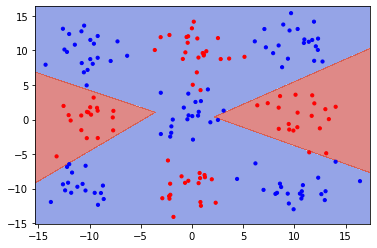

array([-1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int16)

In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

clf.predict(test_x_b)

Adding activation=tahn for the hyperbolic tangent output function and a single hidden layer

3 nodes

C:\Users\sotir\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


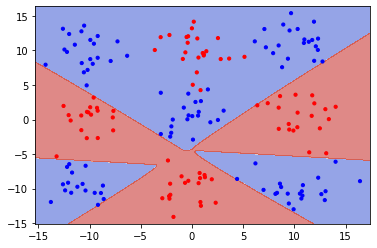

In [18]:
clf = MLPClassifier(solver='lbfgs',activation='tanh', alpha=1e-3,hidden_layer_sizes=(3), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_b,clf.predict(test_x_b))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[86 14]
 [21 59]]
The success rate is  0.8055555555555556


4 nodes

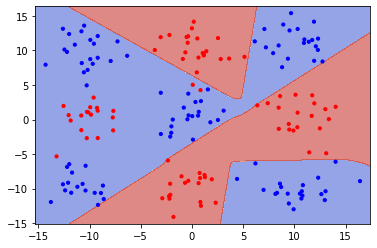

In [20]:
clf = MLPClassifier(solver='lbfgs',activation='tanh', alpha=1e-3,hidden_layer_sizes=(4), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_b,clf.predict(test_x_b))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[91  9]
 [27 53]]
The success rate is  0.8


10 nodes

C:\Users\sotir\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


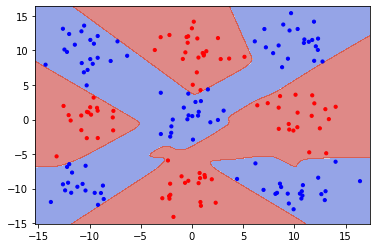

In [22]:
clf = MLPClassifier(solver='lbfgs',activation='tanh', alpha=1e-3,hidden_layer_sizes=(10), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_b,clf.predict(test_x_b))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[91  9]
 [ 4 76]]
The success rate is  0.9277777777777778


50 nodes

C:\Users\sotir\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


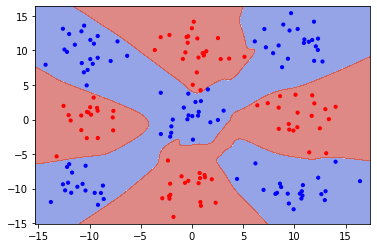

In [24]:
clf = MLPClassifier(solver='lbfgs',activation='tanh', alpha=1e-3,hidden_layer_sizes=(50), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_b,clf.predict(test_x_b))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[93  7]
 [ 2 78]]
The success rate is  0.95


C:\Users\sotir\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


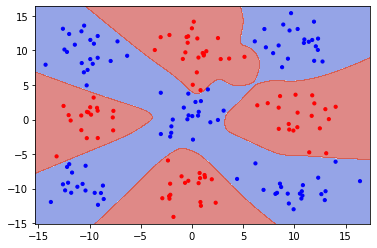

Confusion Matrix 
 [[97  3]
 [ 3 77]]
The success rate is  0.9666666666666667


In [17]:
clf = MLPClassifier(solver='lbfgs',activation='tanh', alpha=1e-3,hidden_layer_sizes=(50, 20), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_b,clf.predict(test_x_b))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

The accuracy score increases, as the number of nodes increase.